In [3]:
# imports and stylization options
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)


# define a dataframe
df = pd.read_csv('wine.csv')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0            7.4              0.70         0.00             1.9      0.076  \
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                 11.0                  34.0   0.9978  3.51       0.56  \
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

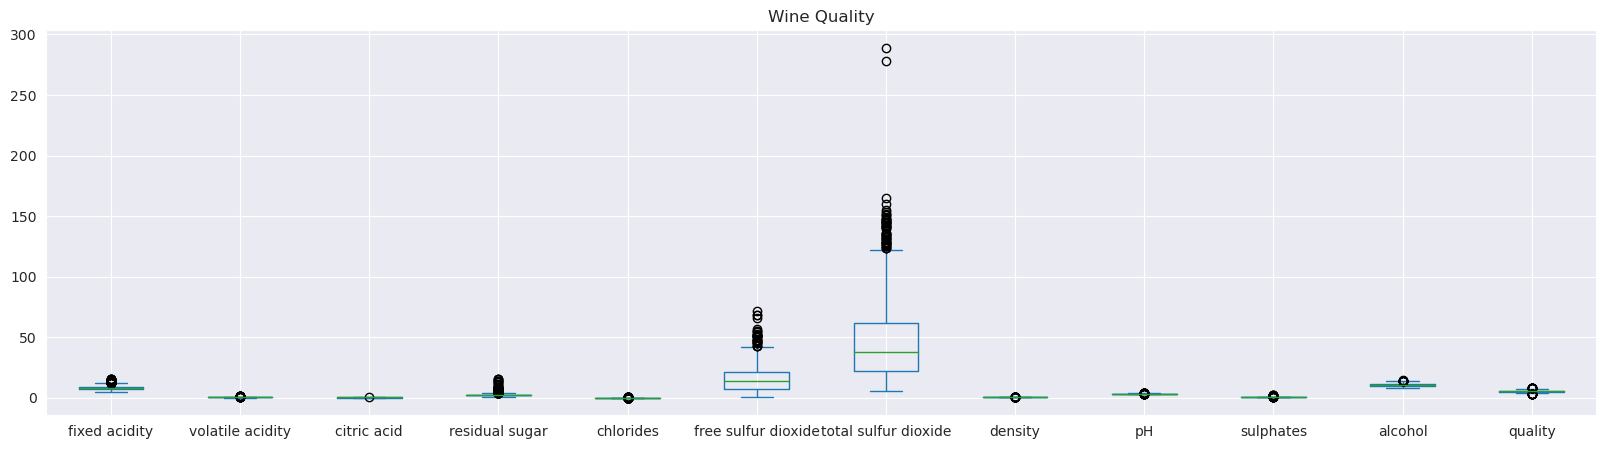

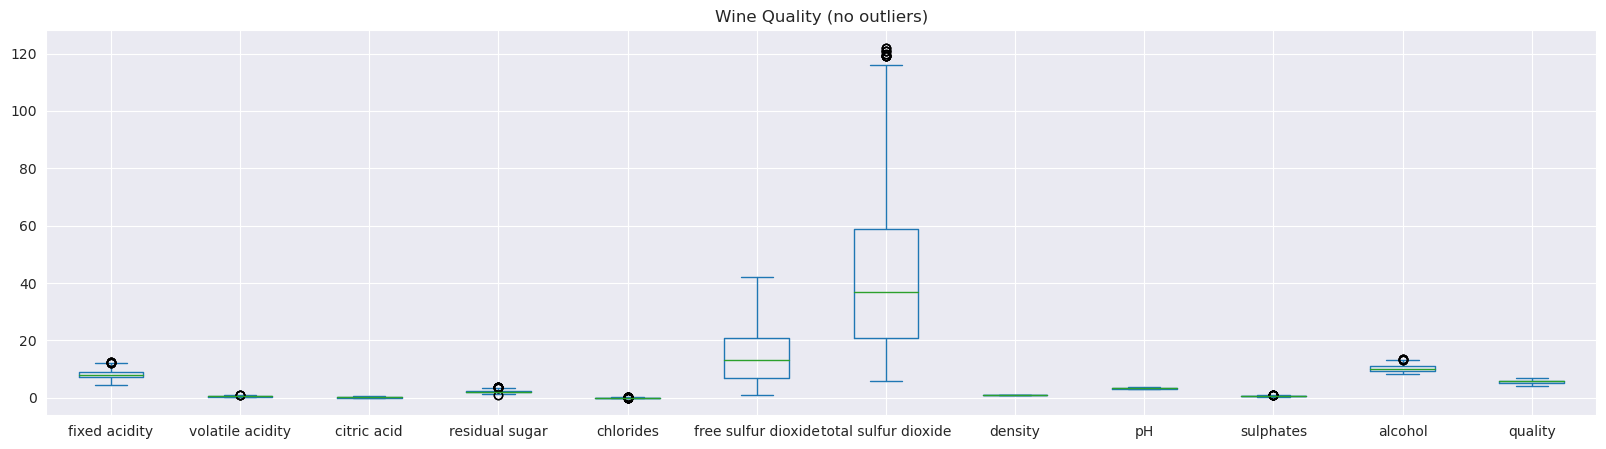

In [4]:
# define quantiles to see if outliers have a big influence
q1 = df.quantile(.25, axis=0, numeric_only=True)
q2 = df.quantile(.5, axis=0, numeric_only=True)
q3 = df.quantile(.75, axis=0, numeric_only=True)
iqr = q3-q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr
outliers = df[(df > upper)|(df < lower).any(axis=1)]

# plot raw and clean data
df.plot(kind='box').set_title('Wine Quality')
df_clean = df[~((df < lower)|(df > upper))]
df_clean.plot(kind='box').set_title('Wine Quality (no outliers)')
plt.show()

Median Wine Quality: 6.0


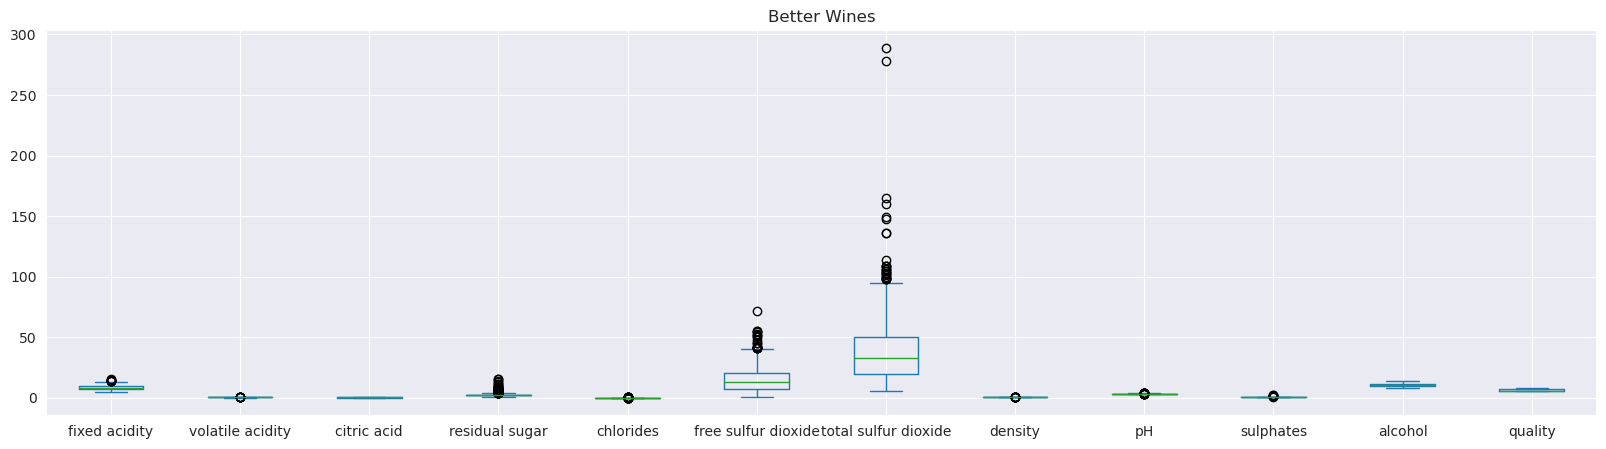

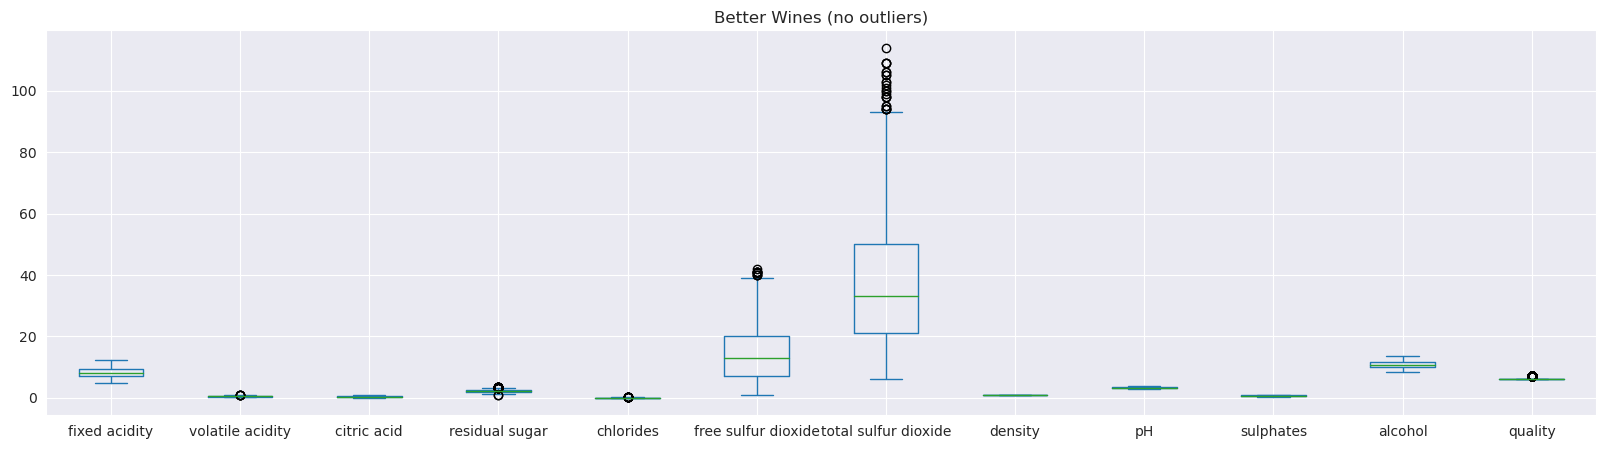

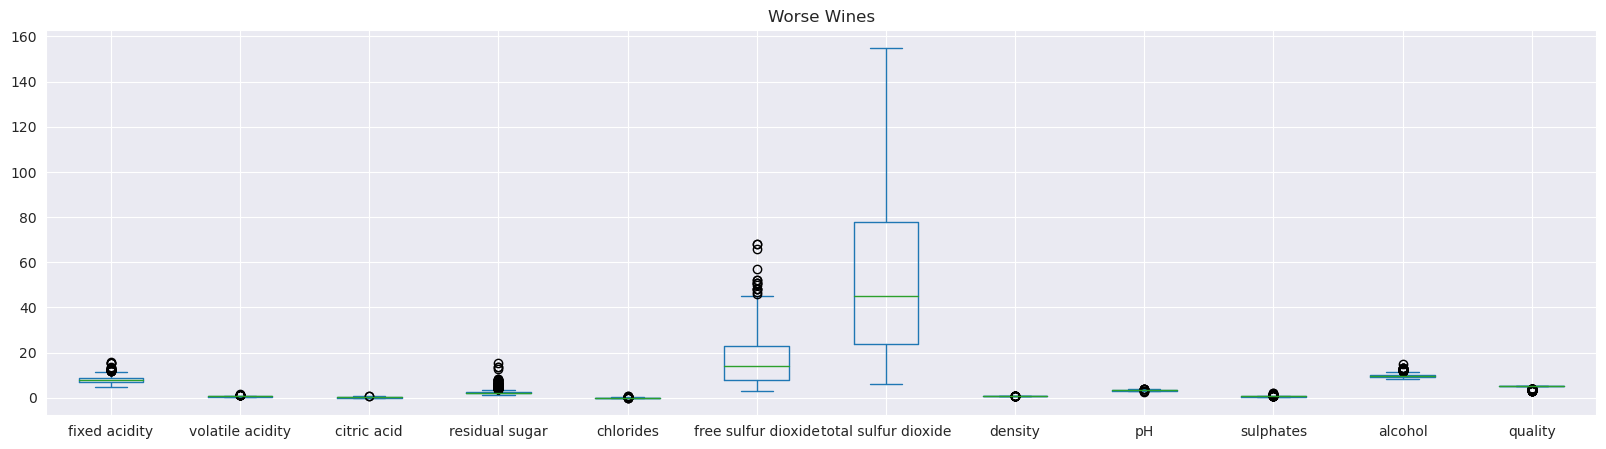

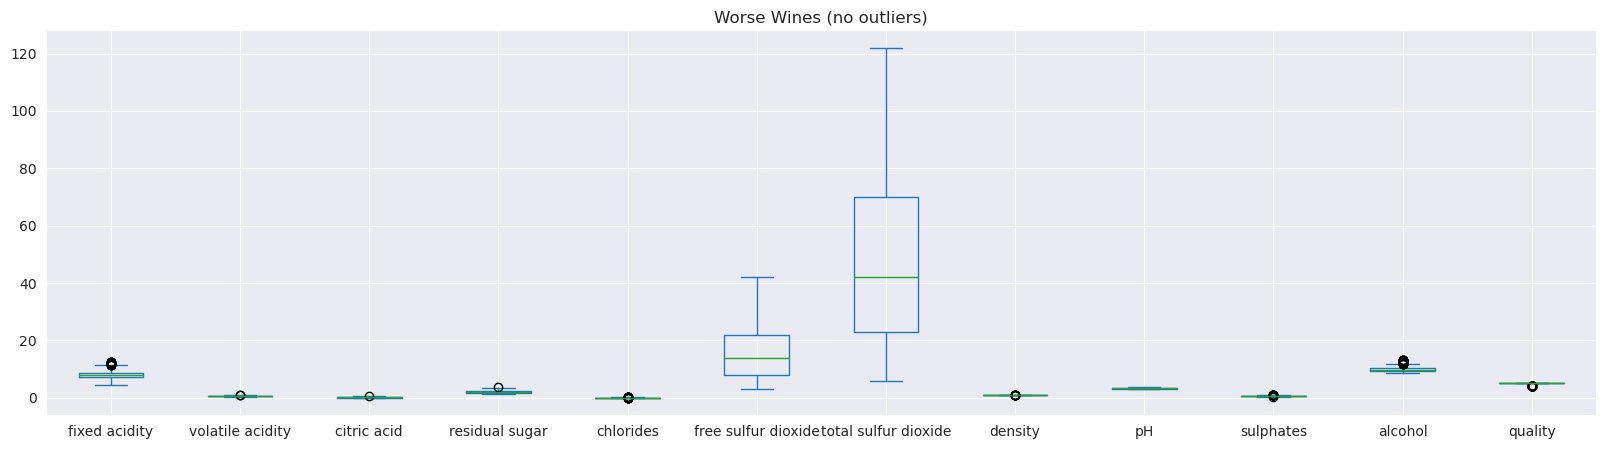

In [5]:
# As shown above, outliers seem to skew the data.
# Continuing, we will explore this to see if there is a deeper connection

# Find wines above and below the median to see if there is a relationship
quality_median = df.quality.median()
quality_median_clean = df_clean.quality.median()

better = df[df['quality'] >= quality_median]
better_clean = df_clean[df_clean['quality'] >= quality_median_clean]

worse = df[df['quality'] < quality_median]
worse_clean = df_clean[df_clean['quality'] < quality_median_clean]

better.plot(kind='box').set_title('Better Wines')
better_clean.plot(kind='box').set_title('Better Wines (no outliers)')

worse.plot(kind='box').set_title('Worse Wines')
worse_clean.plot(kind='box').set_title('Worse Wines (no outliers)')
# df.plot(kind='box').set_title('all')

print(f'Median Wine Quality: {quality_median}')

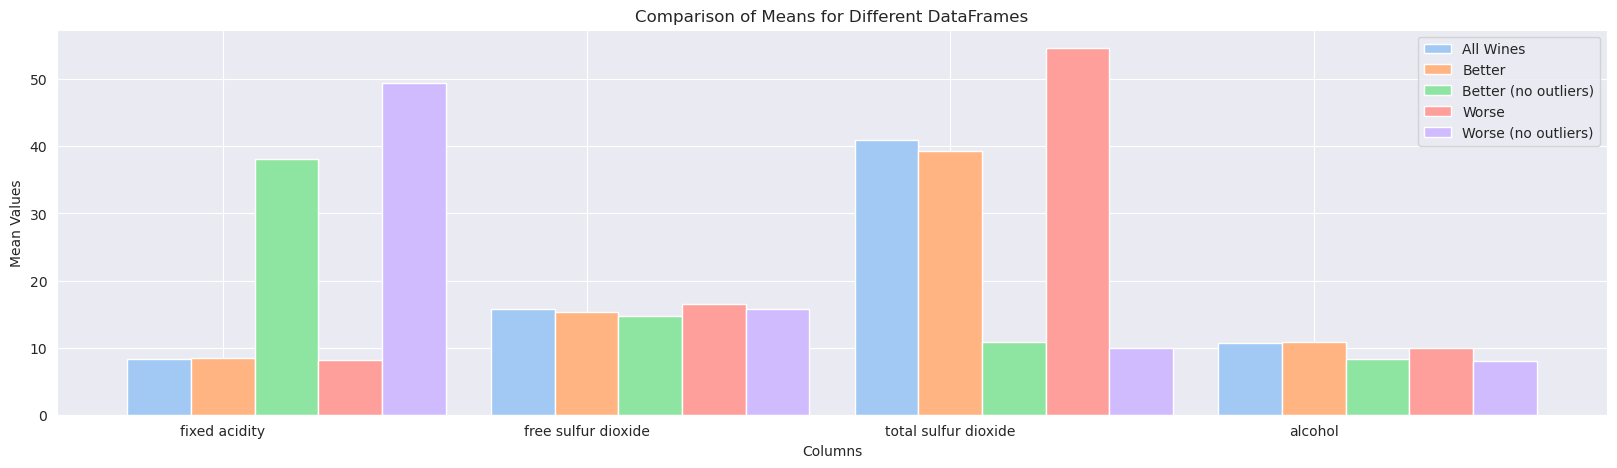

In [8]:
columns = ['fixed acidity', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']
qual_med = df.quality.median()
# Calculate the means for each DataFrame and specified columns
means_qual_med = df.loc[df['quality'] == qual_med, columns].mean()
#means_best = best[columns].mean()
means_better = better[columns].mean()
means_worse = worse[columns].mean()
means_better_clean = better_clean[columns].mean().sort_values(ascending=False)
means_worse_clean = worse_clean[columns].mean().sort_values(ascending=False)

colors = sns.color_palette('pastel')[0:8]

# Set the width of each bar
bar_width = 0.175

# Set the positions of the bars on the x-axis
x = np.arange(len(columns))

# Plot the bars for each DataFrame
plt.bar(x - bar_width, means_qual_med, width=bar_width, label='All Wines',color=colors[0])
plt.bar(x, means_better, width=bar_width, label='Better',color=colors[1])
plt.bar(x + bar_width, means_better_clean, width=bar_width, label='Better (no outliers)',color=colors[2])
plt.bar(x + 2 * bar_width, means_worse, width=bar_width, label='Worse',color=colors[3])
plt.bar(x + 3 * bar_width, means_worse_clean, width=bar_width,label='Worse (no outliers)',color=colors[4])

# Set the labels for the x-axis and y-axis
plt.xlabel('Columns')
plt.ylabel('Mean Values')

# Set the title of the graph
plt.title('Comparison of Means for Different DataFrames')

# Set the tick positions and labels on the x-axis
plt.xticks(x, columns)

# Add a legend
plt.legend()

# Show the plot
plt.show()


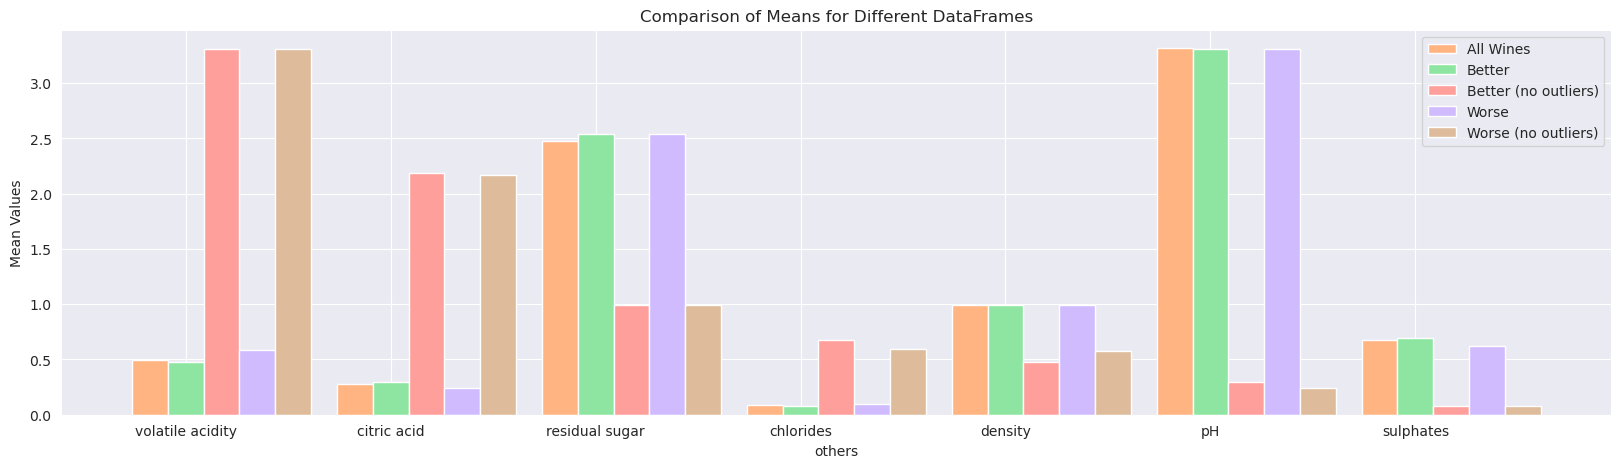

In [9]:
others = ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'density', 'pH', 'sulphates']

# Calculate the means for each DataFrame and specified others
means_qual_med = df.loc[df['quality'] == qual_med, others].mean()
#$means_best = best[others].mean()
means_better = better[others].mean()
means_worse = worse[others].mean()
means_better_clean = better_clean[others].mean().sort_values(ascending=False)
means_worse_clean = worse_clean[others].mean().sort_values(ascending=False)



# Set the width of each bar
bar_width = 0.175

# Set the positions of the bars on the x-axis
x = np.arange(len(others))

# Plot the bars for each DataFrame
plt.bar(x - bar_width, means_qual_med, width=bar_width, label='All Wines',color=colors[1])
plt.bar(x, means_better, width=bar_width, label='Better',color=colors[2])
plt.bar(x + bar_width, means_better_clean, width=bar_width, label='Better (no outliers)',color=colors[3])
plt.bar(x + 2 * bar_width, means_worse, width=bar_width, label='Worse',color=colors[4])
plt.bar(x + 3 * bar_width, means_worse_clean, width=bar_width,label='Worse (no outliers)',color=colors[5])

# Set the labels for the x-axis and y-axis
plt.xlabel('others')
plt.ylabel('Mean Values')

# Set the title of the graph
plt.title('Comparison of Means for Different DataFrames')

# Set the tick positions and labels on the x-axis
plt.xticks(x, others)

# Add a legend
plt.legend()

# Show the plot
plt.show()


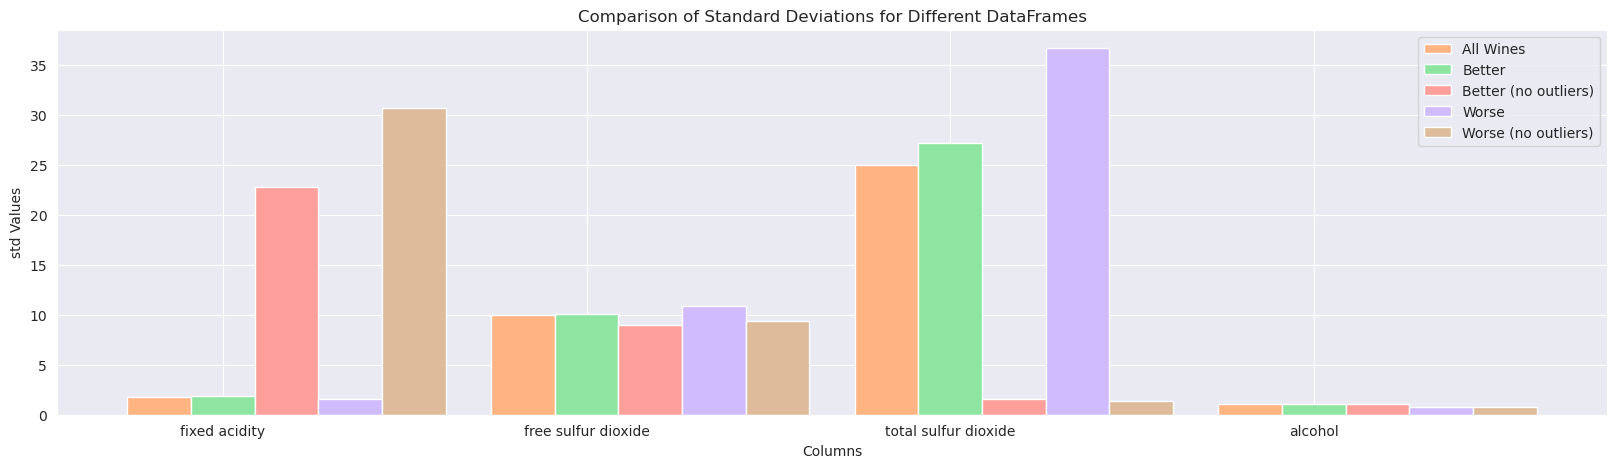

In [10]:
columns = ['fixed acidity', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']
qual_med = df.quality.median()
# Calculate the std for each DataFrame and specified columns
std_qual_med = df.loc[df['quality'] == qual_med, columns].std()
#std_best = best[columns].std()
std_better = better[columns].std()
std_worse = worse[columns].std()
std_better_clean = better_clean[columns].std().sort_values(ascending=False)
std_worse_clean = worse_clean[columns].std().sort_values(ascending=False)






# Set the width of each bar
bar_width = 0.175

# Set the positions of the bars on the x-axis
x = np.arange(len(columns))

# Plot the bars for each DataFrame
plt.bar(x - bar_width, std_qual_med, width=bar_width, label='All Wines',color=colors[1])
plt.bar(x, std_better, width=bar_width, label='Better',color=colors[2])
plt.bar(x + bar_width, std_better_clean, width=bar_width, label='Better (no outliers)',color=colors[3])
plt.bar(x + 2 * bar_width, std_worse, width=bar_width, label='Worse',color=colors[4])
plt.bar(x + 3 * bar_width, std_worse_clean, width=bar_width,label='Worse (no outliers)',color=colors[5])

# Set the labels for the x-axis and y-axis
plt.xlabel('Columns')
plt.ylabel('std Values')

# Set the title of the graph
plt.title('Comparison of Standard Deviations for Different DataFrames')

# Set the tick positions and labels on the x-axis
plt.xticks(x, columns)

# Add a legend
plt.legend()

# Show the plot
plt.show()

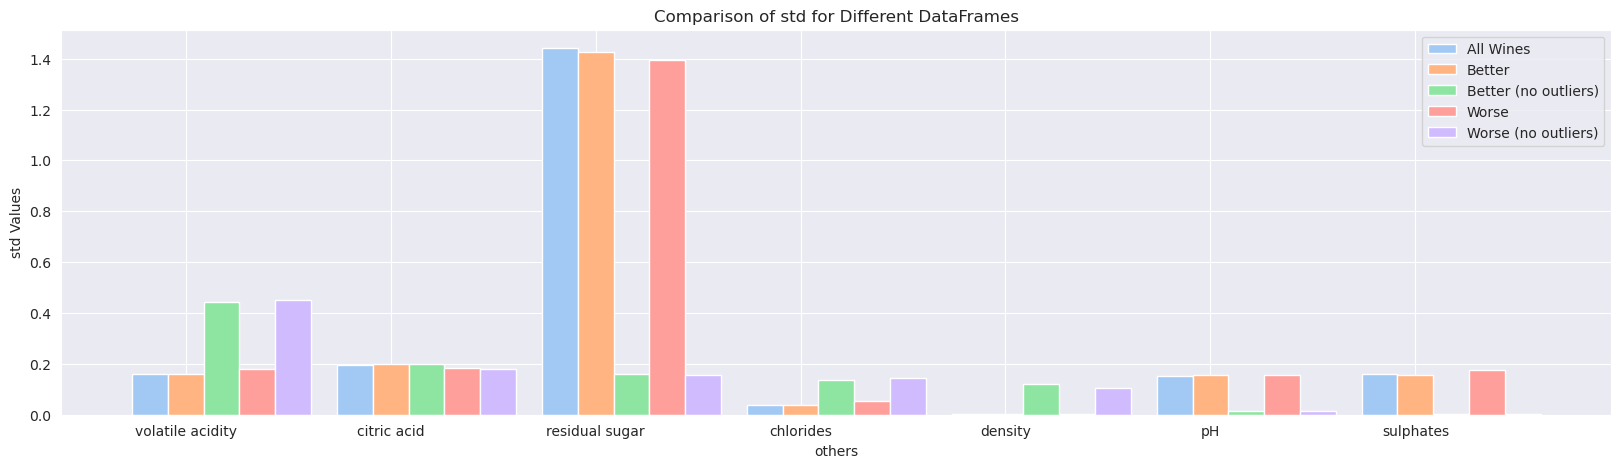

In [12]:
others = ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'density', 'pH', 'sulphates']

# Calculate the std for each DataFrame and specified others
std_qual_med = df.loc[df['quality'] == qual_med, others].std()
#$std_best = best[others].std()
std_better = better[others].std()
std_worse = worse[others].std()
std_better_clean = better_clean[others].std().sort_values(ascending=False)
std_worse_clean = worse_clean[others].std().sort_values(ascending=False)



# Set the width of each bar
bar_width = 0.175

# Set the positions of the bars on the x-axis
x = np.arange(len(others))

# Plot the bars for each DataFrame
plt.bar(x - bar_width, std_qual_med, width=bar_width, label='All Wines',color=colors[0])
plt.bar(x, std_better, width=bar_width, label='Better',color=colors[1])
plt.bar(x + bar_width, std_better_clean, width=bar_width, label='Better (no outliers)',color=colors[2])
plt.bar(x + 2 * bar_width, std_worse, width=bar_width, label='Worse',color=colors[3])
plt.bar(x + 3 * bar_width, std_worse_clean, width=bar_width,label='Worse (no outliers)',color=colors[4])

# Set the labels for the x-axis and y-axis
plt.xlabel('others')
plt.ylabel('std Values')

# Set the title of the graph
plt.title('Comparison of std for Different DataFrames')

# Set the tick positions and labels on the x-axis
plt.xticks(x, others)

# Add a legend
plt.legend()


# Show the plot
plt.show()


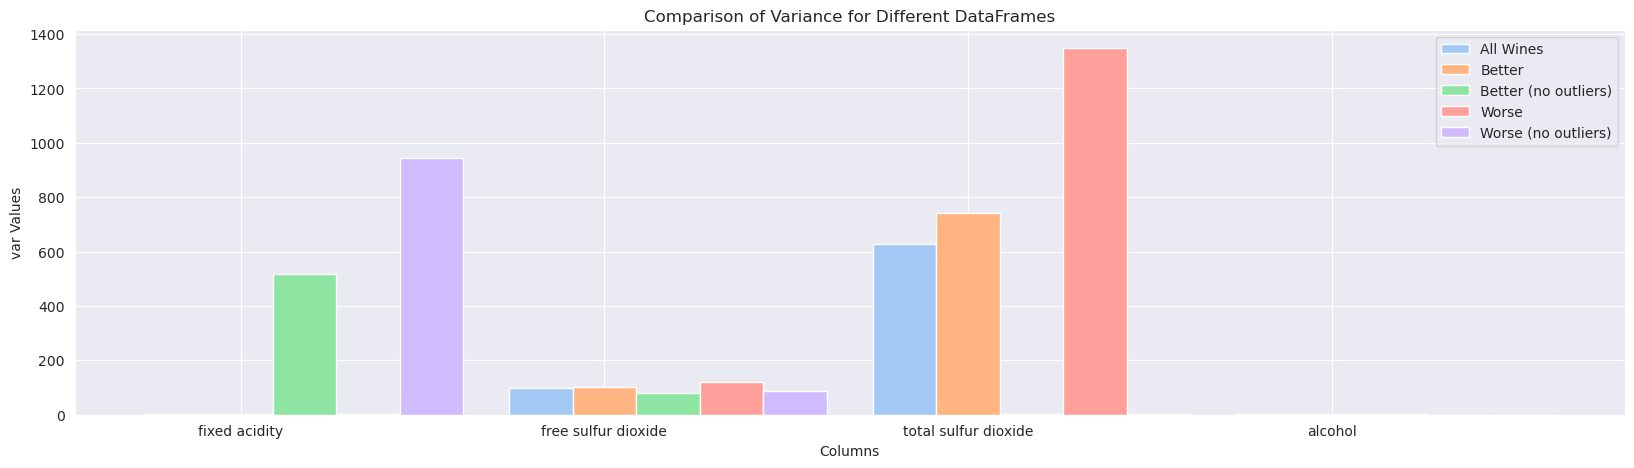

In [14]:
columns = ['fixed acidity', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']
qual_med = df.quality.median()
# Calculate the var for each DataFrame and specified columns
var_qual_med = df.loc[df['quality'] == qual_med, columns].var()
#var_best = best[columns].var()
var_better = better[columns].var()
var_worse = worse[columns].var()
var_better_clean = better_clean[columns].var().sort_values(ascending=False)
var_worse_clean = worse_clean[columns].var().sort_values(ascending=False)



# Set the width of each bar
bar_width = 0.175

# Set the positions of the bars on the x-axis
x = np.arange(len(columns))

# Plot the bars for each DataFrame
plt.bar(x - bar_width, var_qual_med, width=bar_width, label='All Wines',color=colors[0])
plt.bar(x, var_better, width=bar_width, label='Better',color=colors[1])
plt.bar(x + bar_width, var_better_clean, width=bar_width, label='Better (no outliers)',color=colors[2])
plt.bar(x + 2 * bar_width, var_worse, width=bar_width, label='Worse',color=colors[3])
plt.bar(x + 3 * bar_width, var_worse_clean, width=bar_width,label='Worse (no outliers)',color=colors[4])

# Set the labels for the x-axis and y-axis
plt.xlabel('Columns')
plt.ylabel('var Values')

# Set the title of the graph
plt.title('Comparison of Variance for Different DataFrames')

# Set the tick positions and labels on the x-axis
plt.xticks(x, columns)

# Add a legend
plt.legend()

# Show the plot
plt.show()


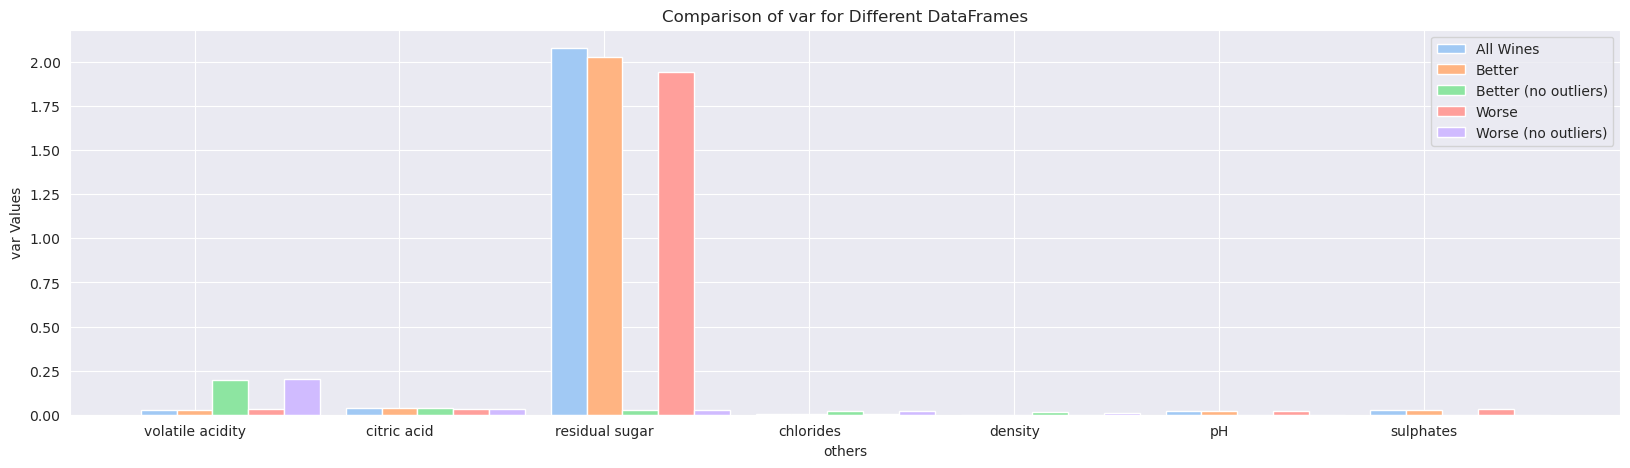

In [16]:
others = ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'density', 'pH', 'sulphates']

# Calculate the var for each DataFrame and specified others
var_qual_med = df.loc[df['quality'] == qual_med, others].var()
#$var_best = best[others].var()
var_better = better[others].var()
var_worse = worse[others].var()
var_better_clean = better_clean[others].var().sort_values(ascending=False)
var_worse_clean = worse_clean[others].var().sort_values(ascending=False)



# Set the width of each bar
bar_width = 0.175

# Set the positions of the bars on the x-axis
x = np.arange(len(others))

# Plot the bars for each DataFrame
plt.bar(x - bar_width, var_qual_med, width=bar_width, label='All Wines',color=colors[0])
plt.bar(x, var_better, width=bar_width, label='Better',color=colors[1])
plt.bar(x + bar_width, var_better_clean, width=bar_width, label='Better (no outliers)',color=colors[2])
plt.bar(x + 2 * bar_width, var_worse, width=bar_width, label='Worse',color=colors[3])
plt.bar(x + 3 * bar_width, var_worse_clean, width=bar_width,label='Worse (no outliers)',color=colors[4])

# Set the labels for the x-axis and y-axis
plt.xlabel('others')
plt.ylabel('var Values')

# Set the title of the graph
plt.title('Comparison of var for Different DataFrames')

# Set the tick positions and labels on the x-axis
plt.xticks(x, others)

# Add a legend
plt.legend()


# Show the plot
plt.show()


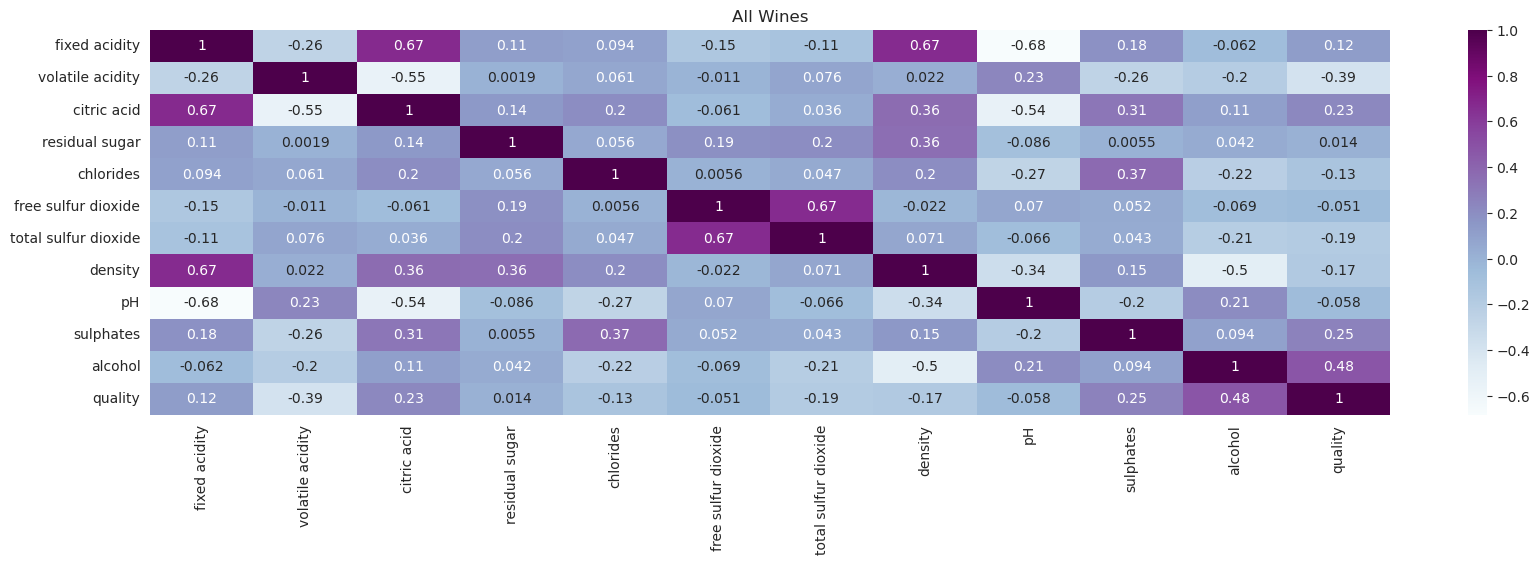

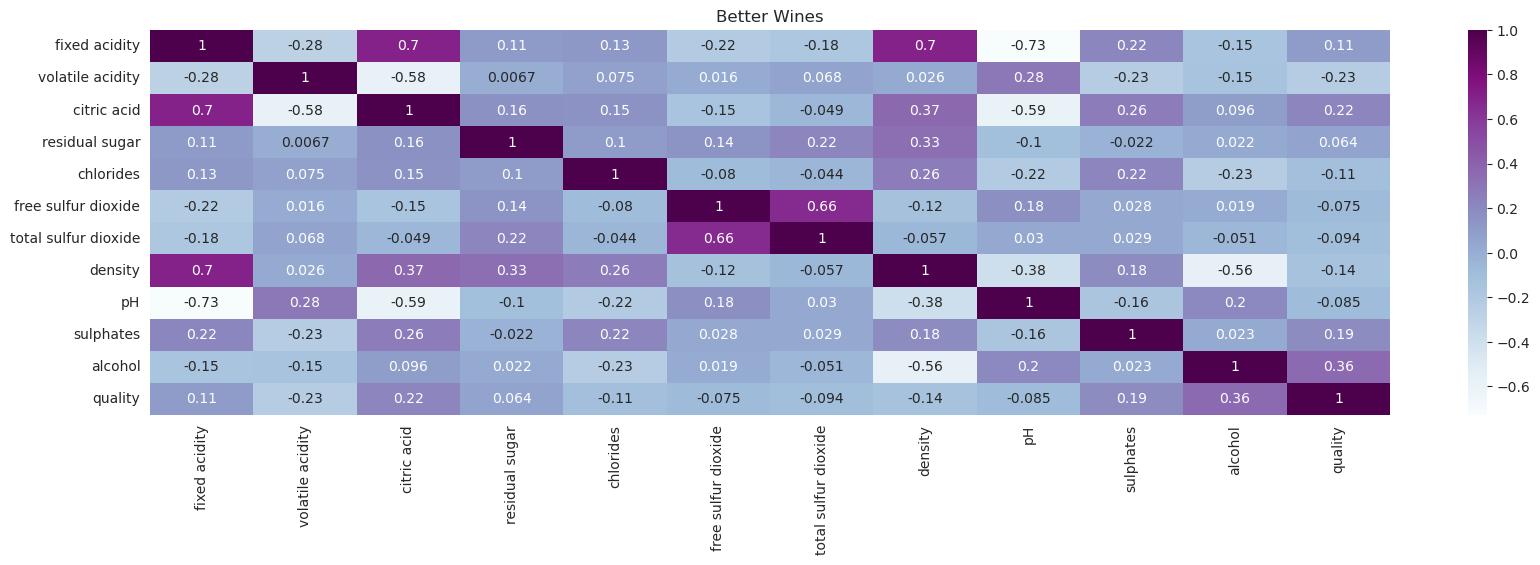

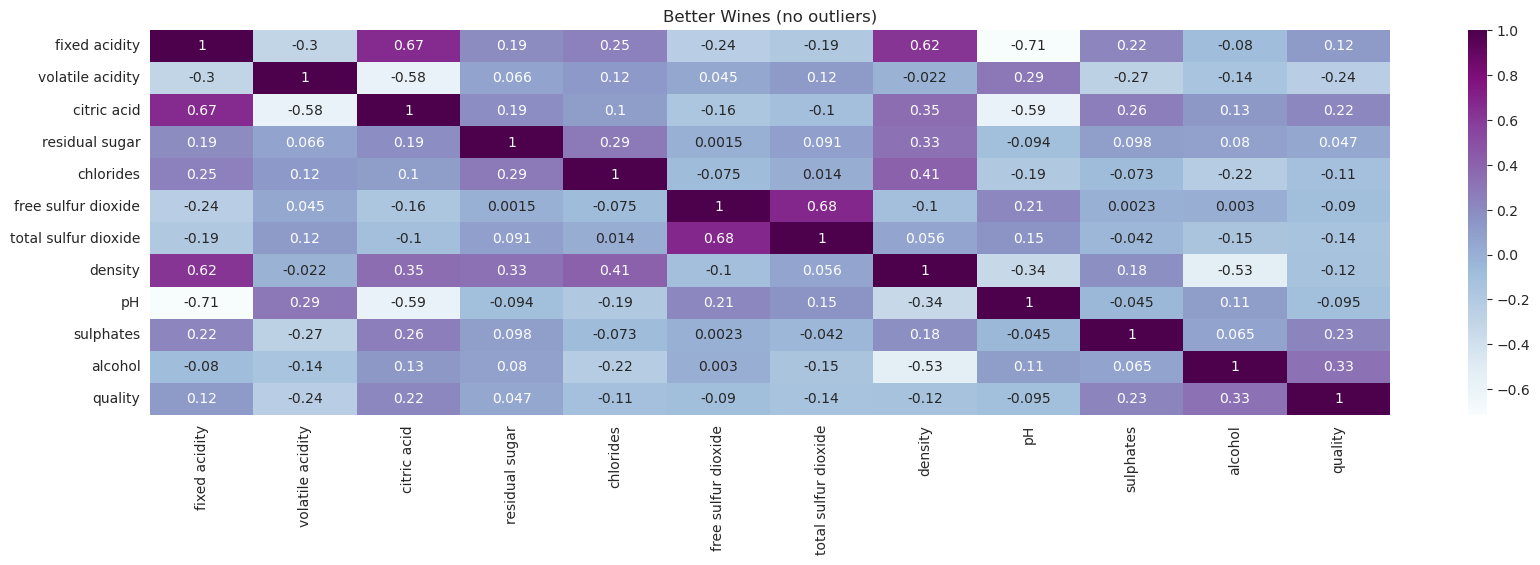

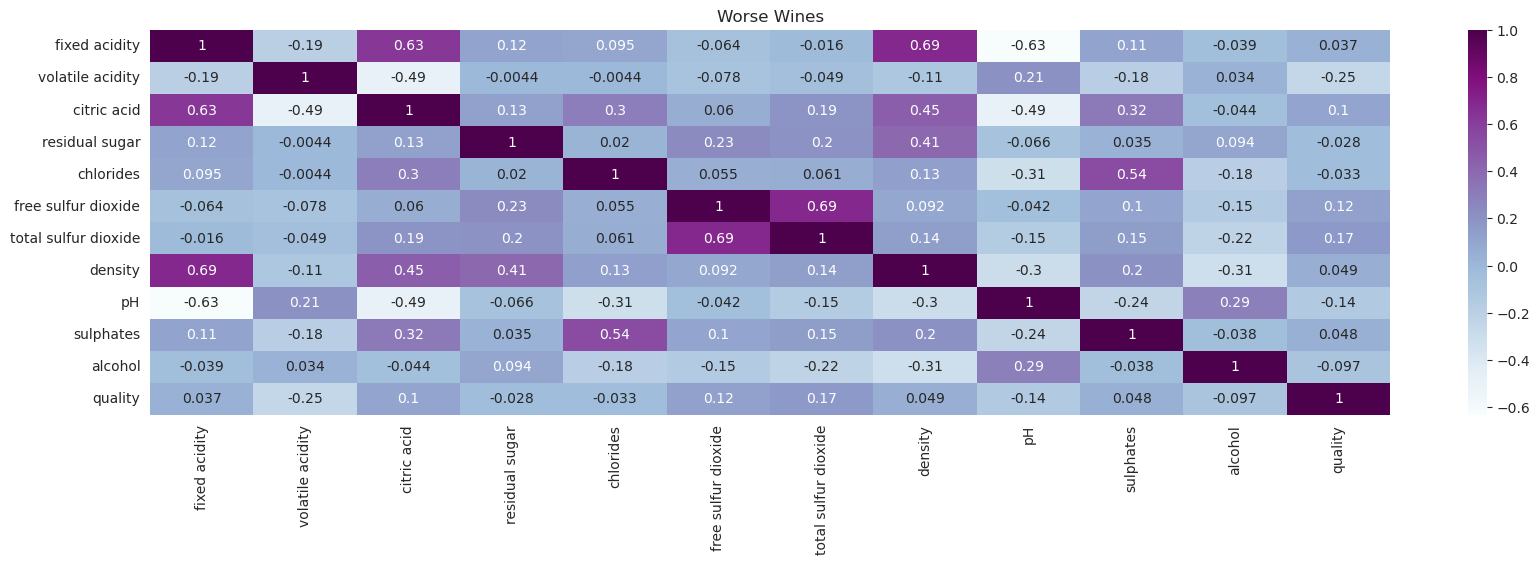

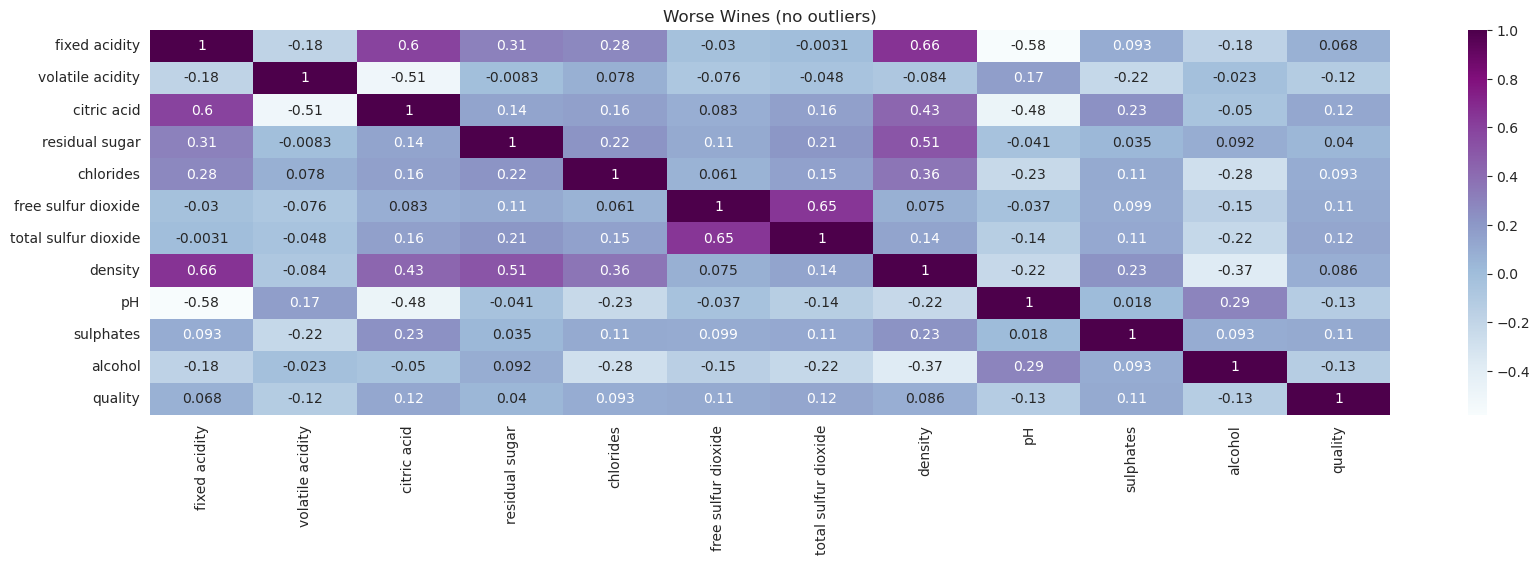

In [16]:
corr = df.corr(numeric_only=True)
better_corr = better.corr(numeric_only=True)
worse_corr = worse.corr(numeric_only=True)
better_clean_corr = better_clean.corr(numeric_only=True)
worse_clean_corr = worse_clean.corr(numeric_only=True)

"""
sns.heatmap(corr,annot=True).set_title("All Wines")
plt.show()
sns.heatmap(better_corr,annot=True).set_title("Better Wines")
plt.show()
sns.heatmap(better_clean_corr,annot=True).set_title("Better Wines (no outliers)")
plt.show()
sns.heatmap(worse_corr,annot=True).set_title("Worse Wines")
plt.show()
sns.heatmap(worse_clean_corr,annot=True).set_title("Worse Wines (no outliers)")
plt.show()
"""
listy = "BuPu"
sns.heatmap(corr,cmap=listy,annot=True).set_title("All Wines")
plt.show()
sns.heatmap(better_corr,cmap=listy,annot=True).set_title("Better Wines")
plt.show()
sns.heatmap(better_clean_corr,cmap=listy,annot=True).set_title("Better Wines (no outliers)")
plt.show()
sns.heatmap(worse_corr,cmap=listy,annot=True).set_title("Worse Wines")
plt.show()
sns.heatmap(worse_clean_corr,cmap=listy,annot=True).set_title("Worse Wines (no outliers)")
plt.show()


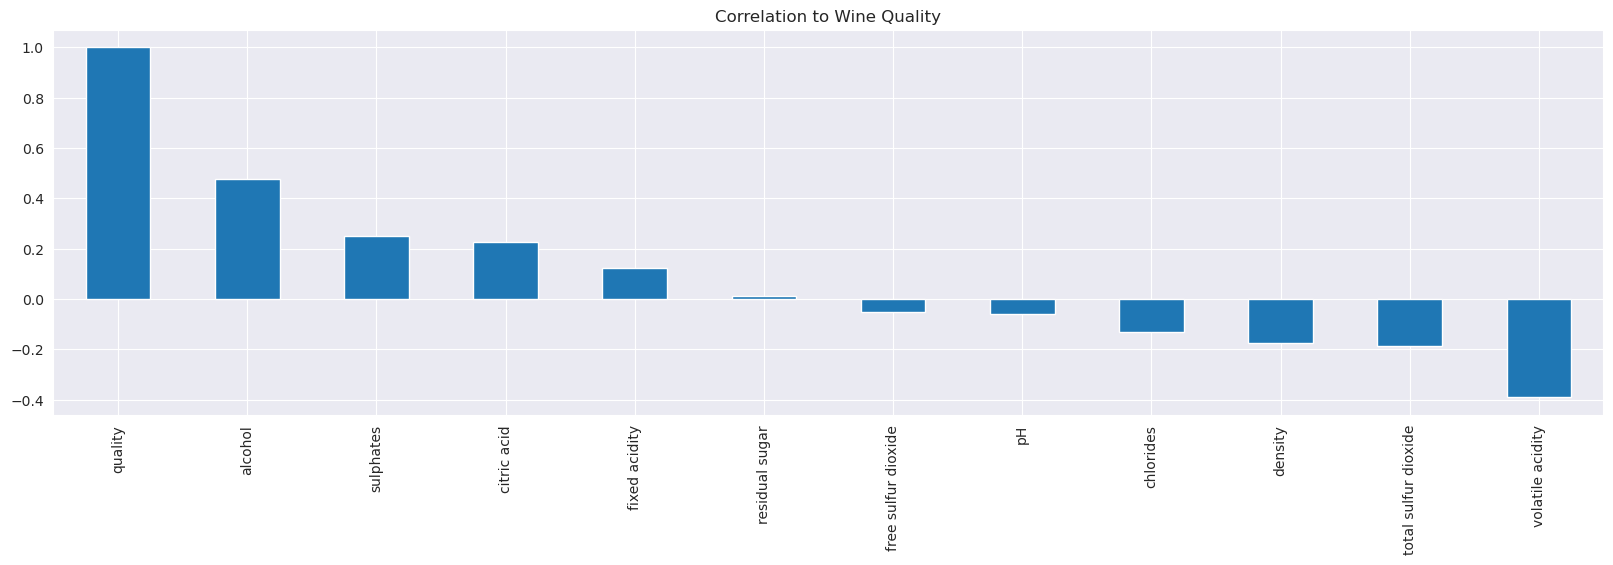

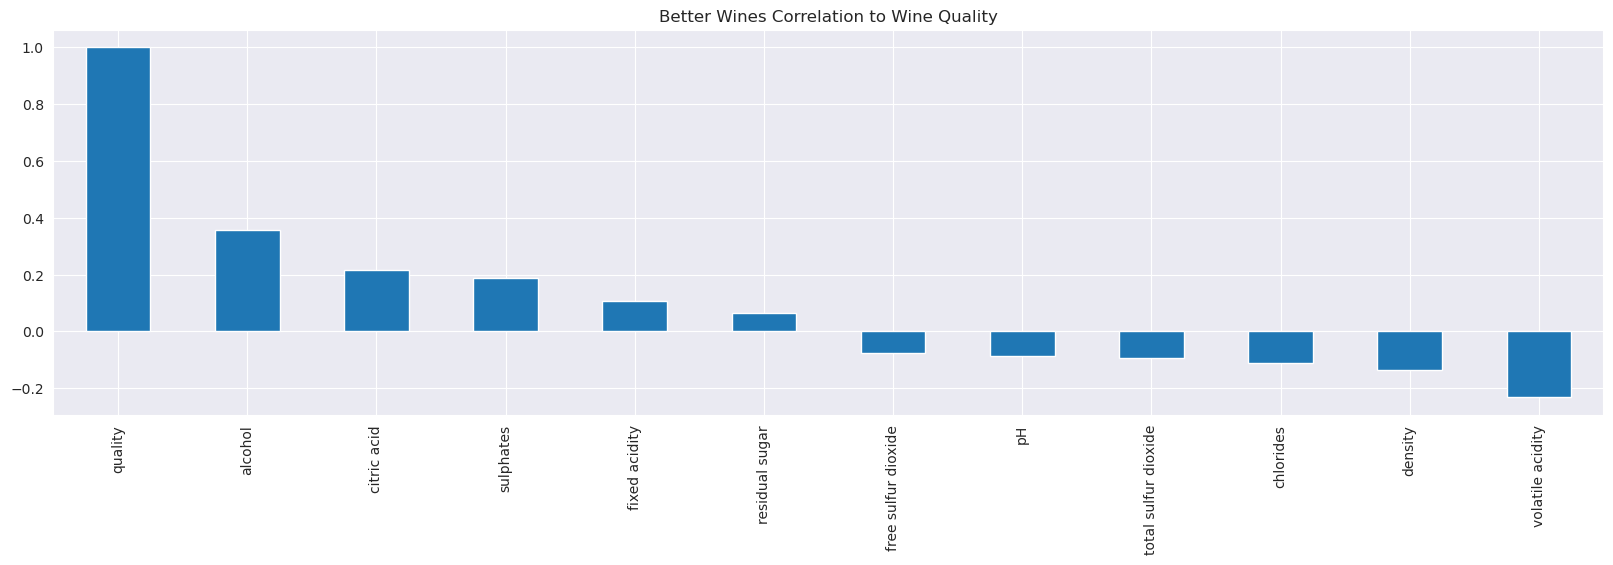

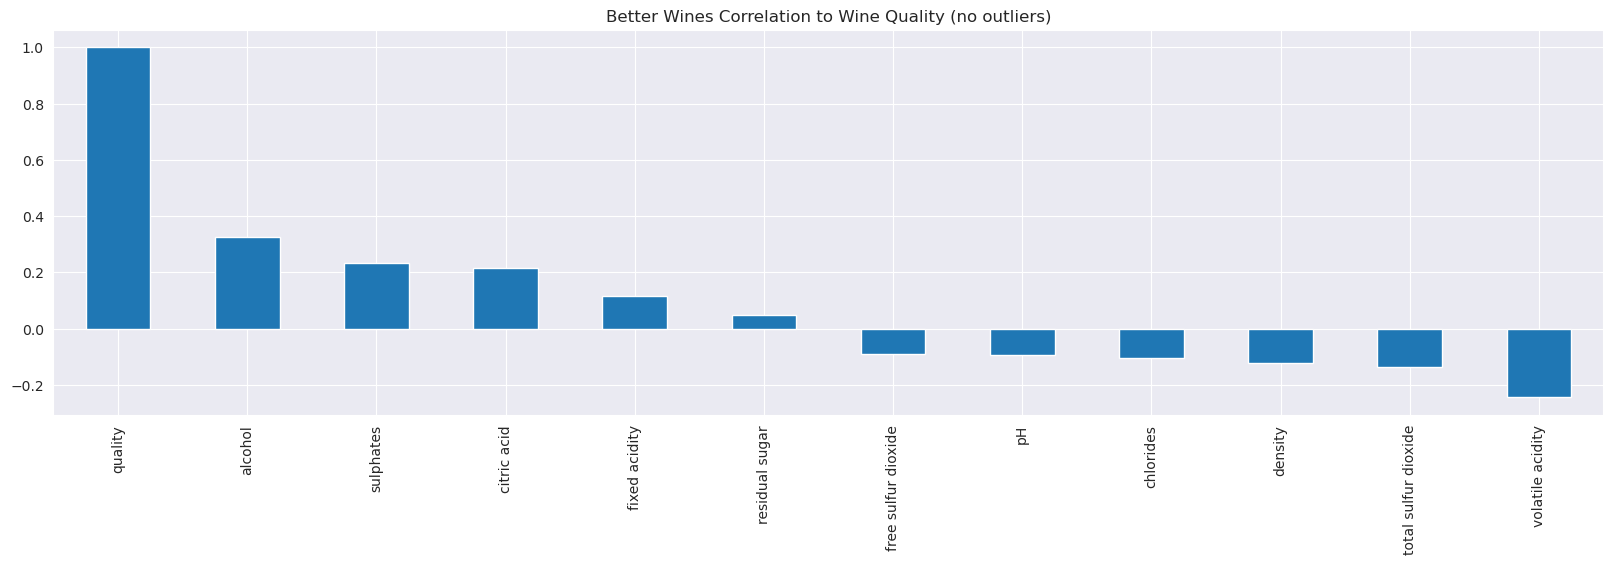

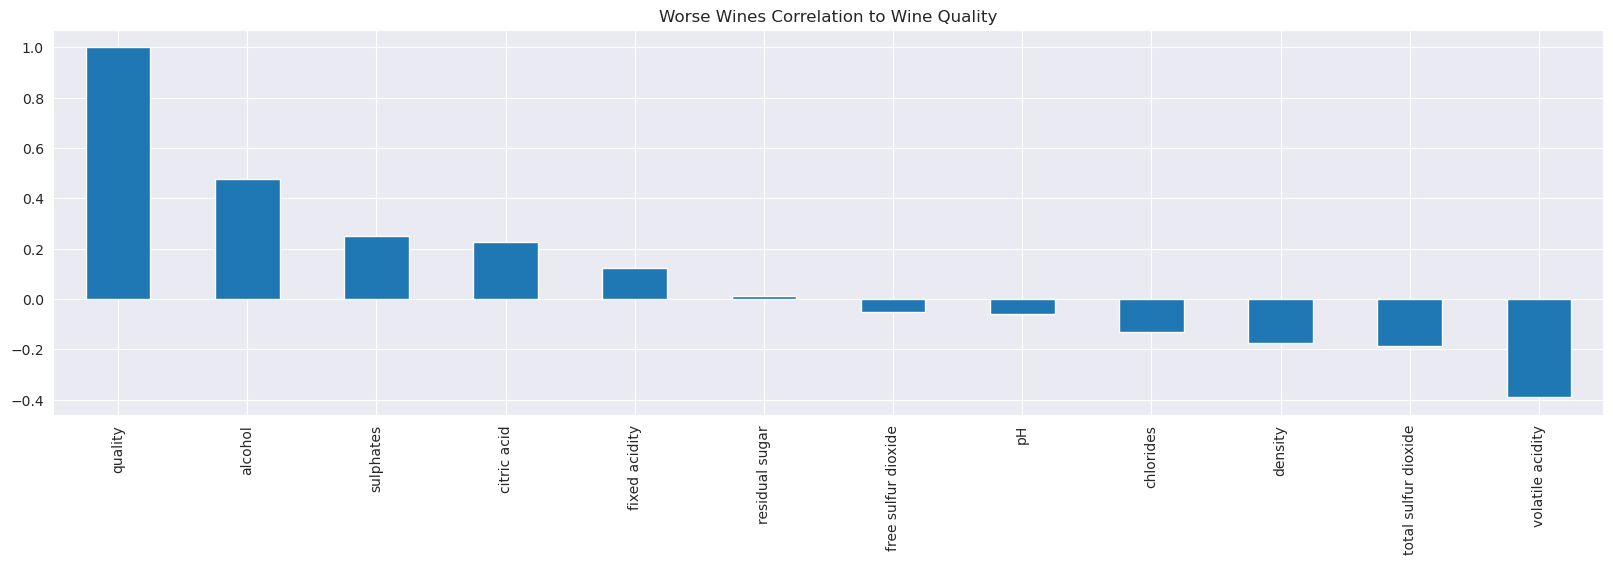

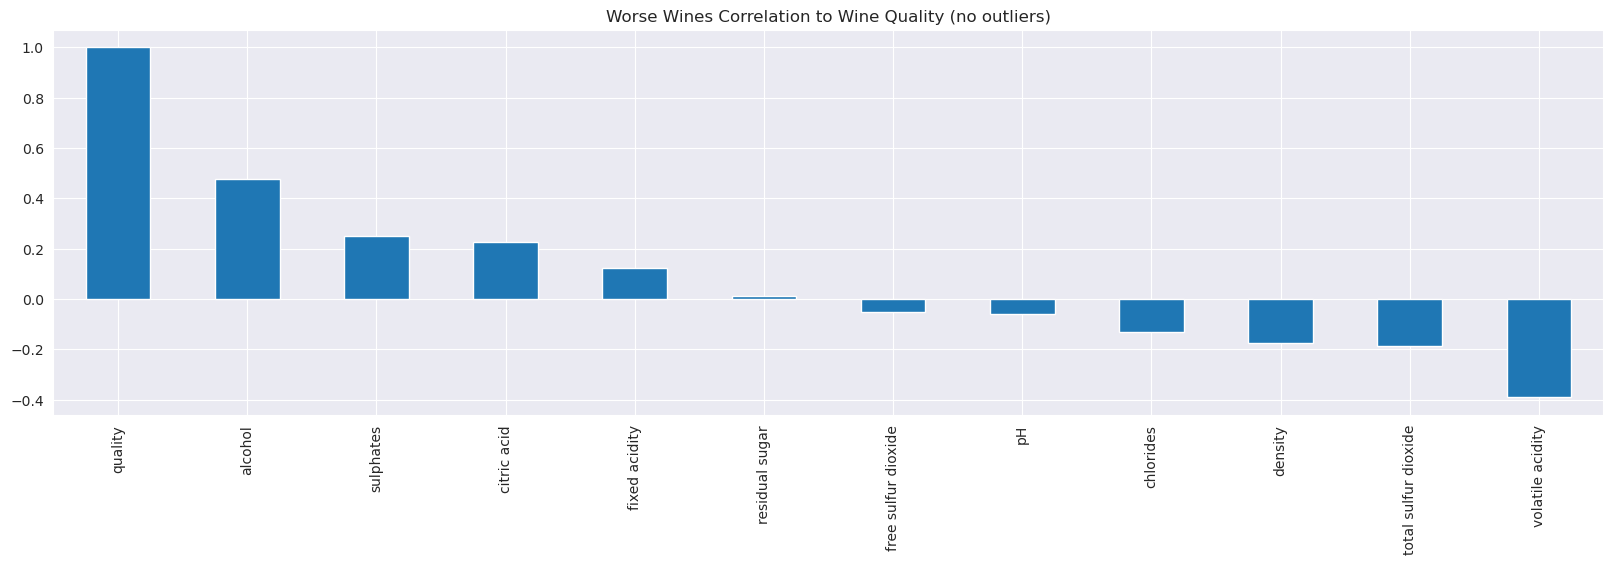

In [17]:
corr.sort_values(by='quality',ascending=False,inplace=True)
corr['quality'].plot(kind='bar').set_title('Correlation to Wine Quality')
plt.show()

better_corr.sort_values(by='quality',ascending=False,inplace=True)
better_corr['quality'].plot(kind='bar').set_title('Better Wines Correlation to Wine Quality')
plt.show()

better_clean_corr.sort_values(by='quality',ascending=False,inplace=True)
better_clean_corr['quality'].plot(kind='bar').set_title('Better Wines Correlation to Wine Quality (no outliers)')
plt.show()

worse_corr.sort_values(by='quality',ascending=False,inplace=True)
corr['quality'].plot(kind='bar').set_title('Worse Wines Correlation to Wine Quality')
plt.show()

worse_clean_corr.sort_values(by='quality',ascending=False,inplace=True)
corr['quality'].plot(kind='bar').set_title('Worse Wines Correlation to Wine Quality (no outliers)')
plt.show()

In [17]:
independent_variables = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', \
                        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', \
                         'pH', 'sulphates', 'alcohol']]
independent_variables = sm.add_constant(independent_variables)
dependent_variable= df['quality']
regression_model= sm.OLS(dependent_variable,independent_variables).fit()


print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Thu, 17 Aug 2023   Prob (F-statistic):          1.79e-145
Time:                        19:48:58   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652 